<h1 style="color:rgba(37, 214, 191, 1);">IMPORTS</h1>

In [55]:
# Todos los imports necesitados en todo el notebook (No hay imports en otras celdas)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

<h1 style="color:rgba(187, 32, 187, 1);">OBSERVACIONES DEL DF</h2>

### 1. Carga del data frame

In [56]:
# Cargamos el dataset en nuestro dataframe df
df = pd.read_excel("Boston.xlsx")

# Cambiamos el tipo de dato de la columna 'CHAS' a integer
df["chas"] = df["chas"].astype(int)

# Mostramos el nuestro dataset
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### 2. Analisis univariado

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

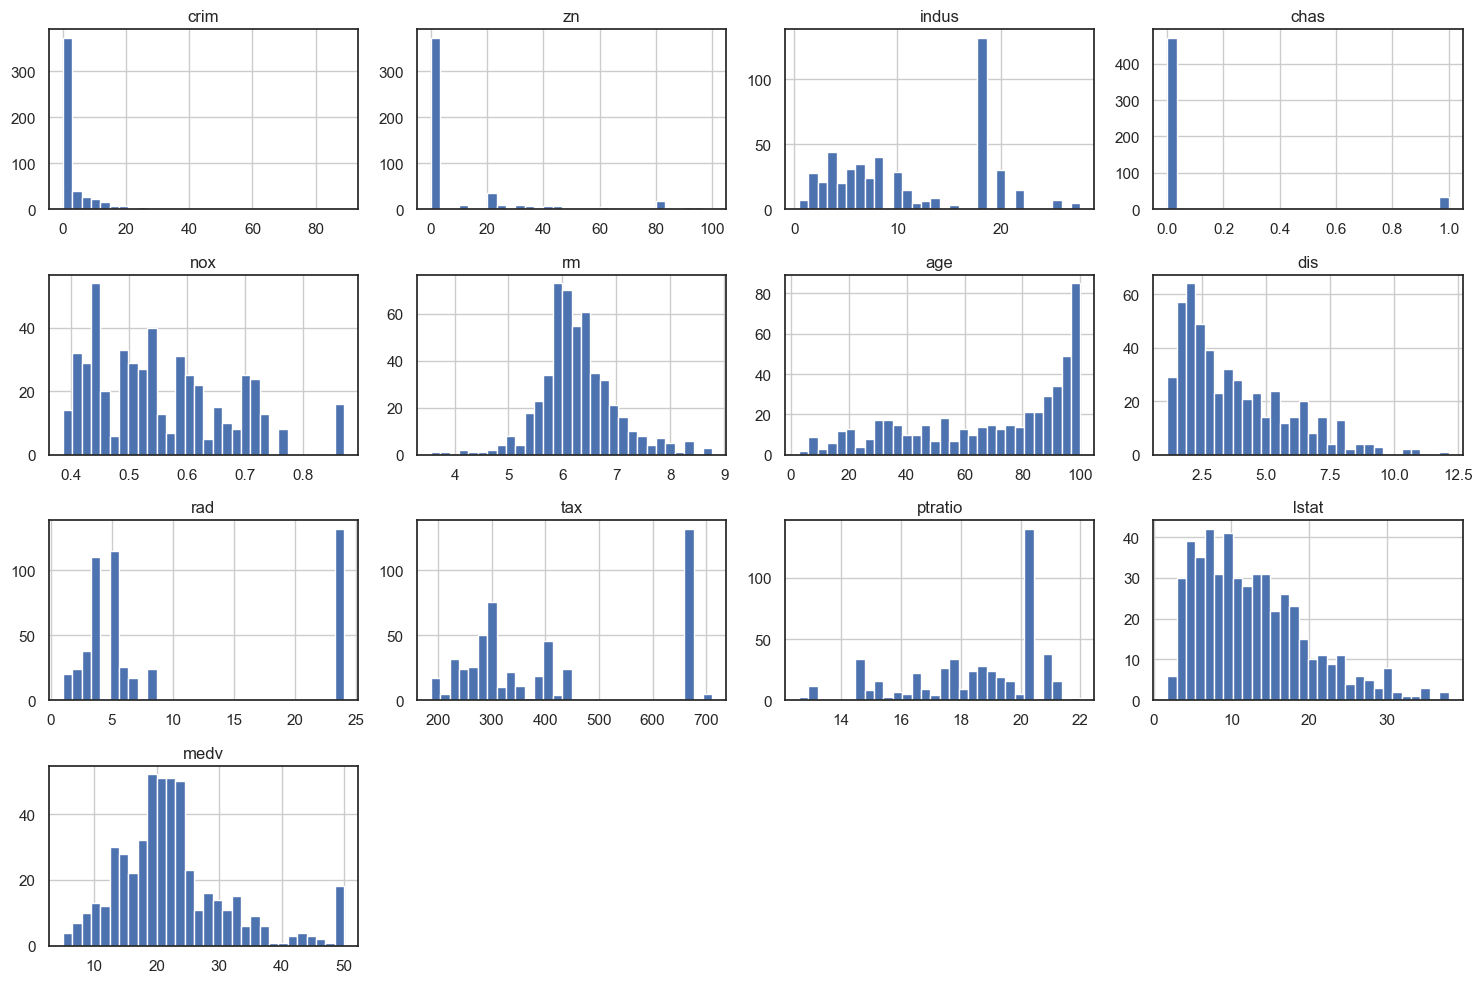

In [57]:
# Visualizamos la distribución de las variables numéricas
print(df.describe())

# Vemos el historgrama
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 3. Analisis bivariado

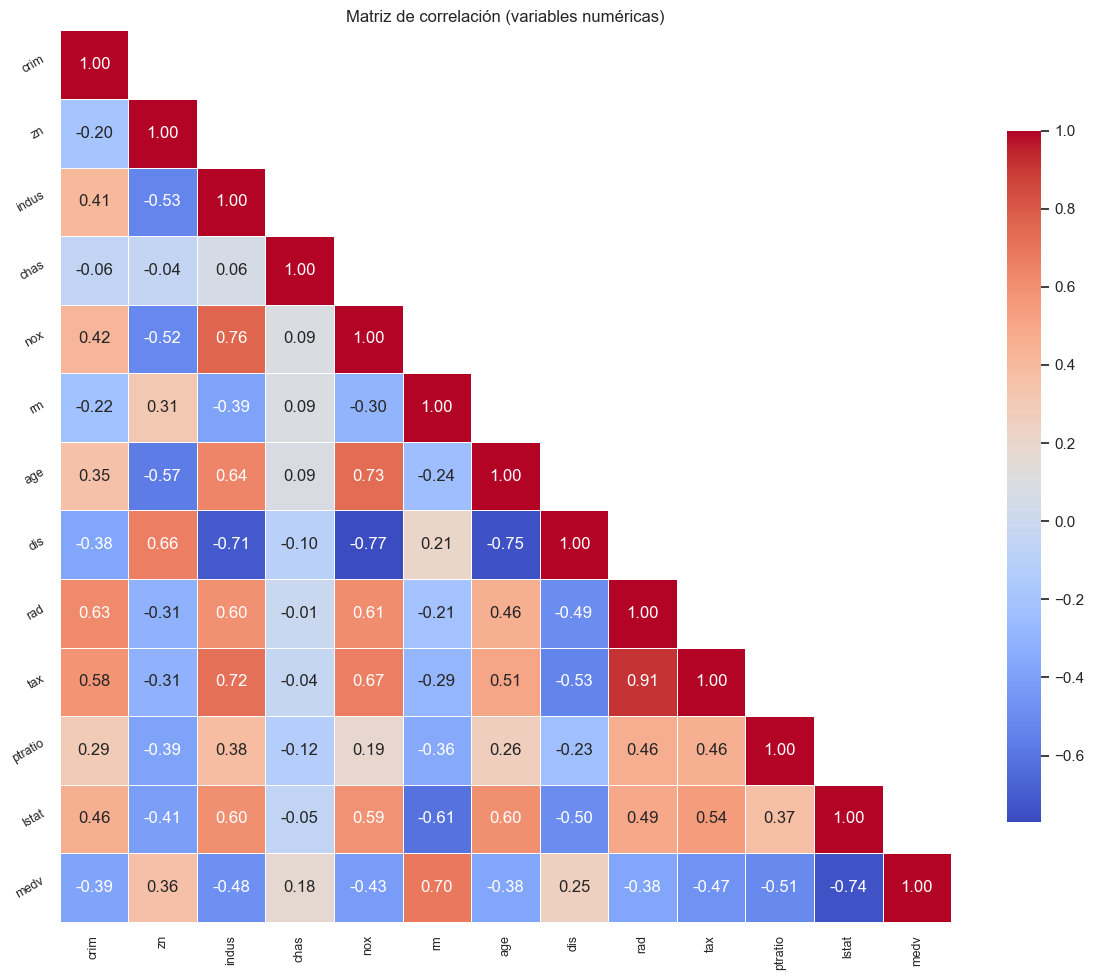

In [58]:
# Visualizamos el Heatmap de correlaciones
corr_matrix = df.corr()

# Enmascaramos el triángulo superior para no duplicar valores
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.set(style="white")  # estilo limpio

# Dibujamos el heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap="coolwarm",          # paleta de colores
    annot=True,               # mostrar coeficientes
    mask=mask,                # aplicar máscara
    fmt=".2f",                # formato numérico
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

# Ajustes de etiquetas
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, fontsize=9)

plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

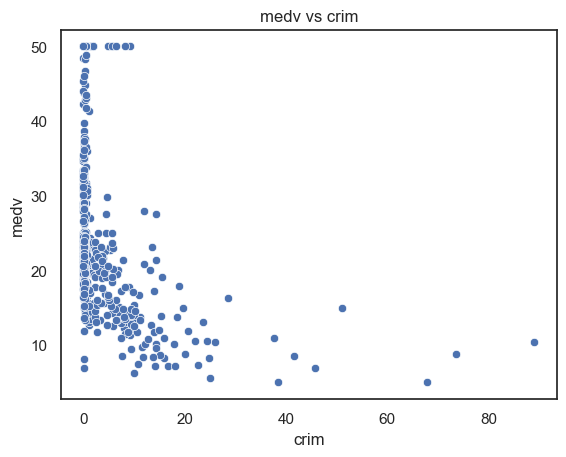

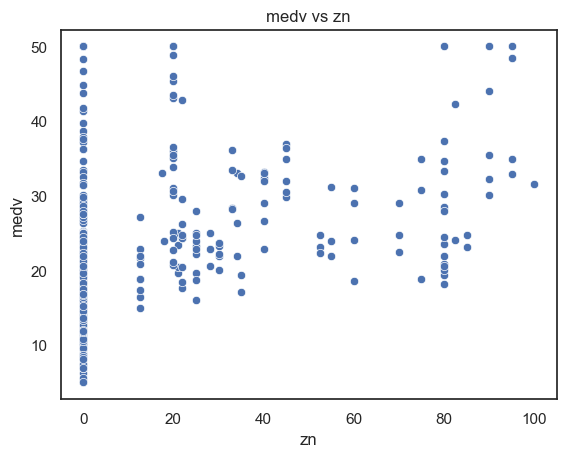

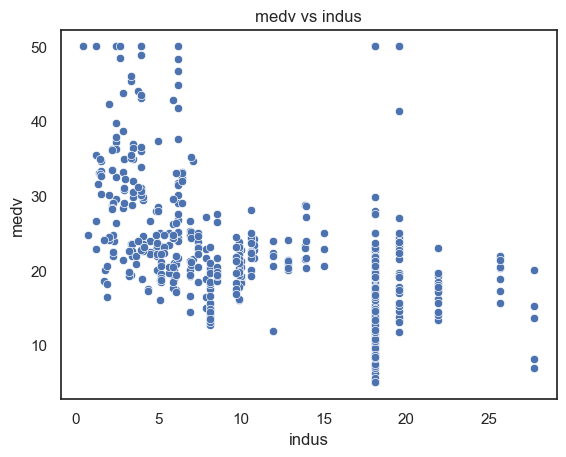

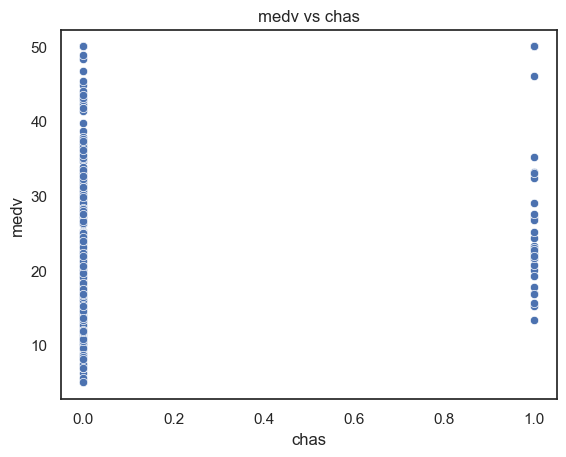

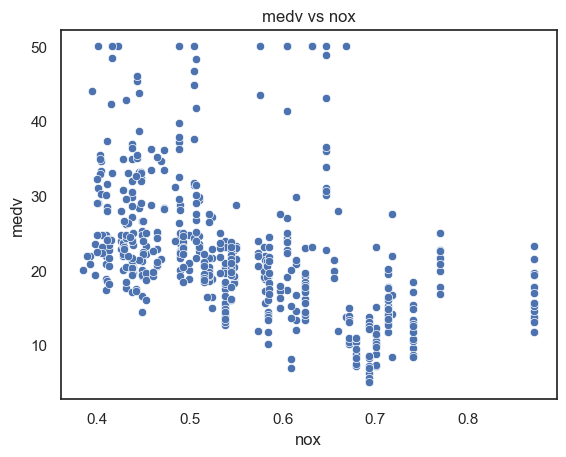

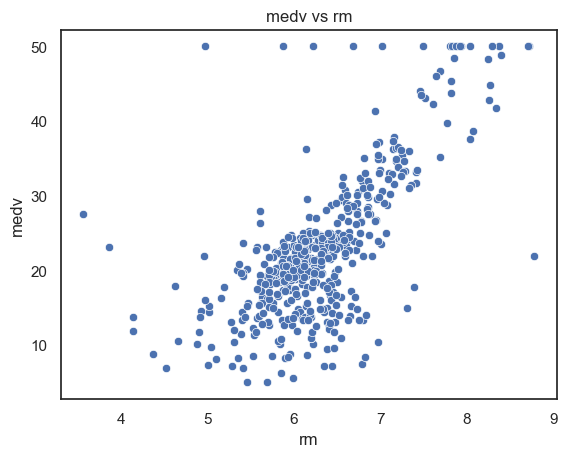

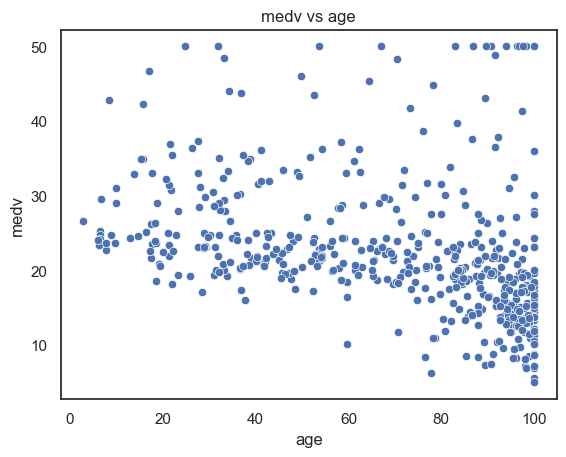

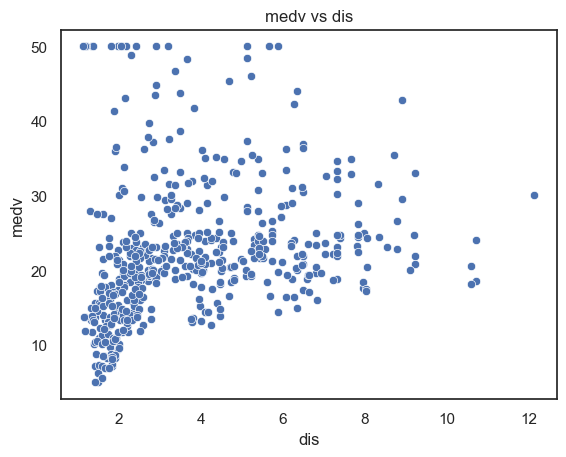

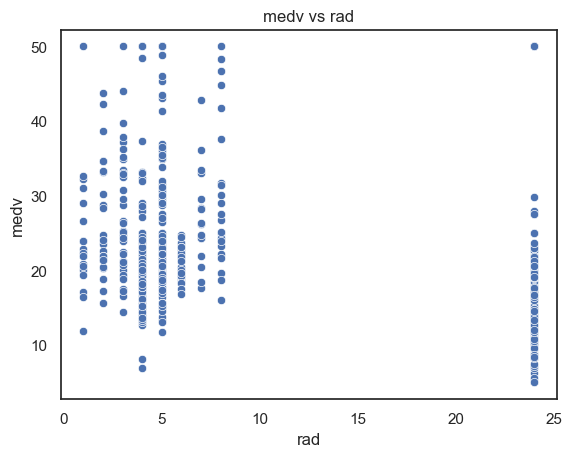

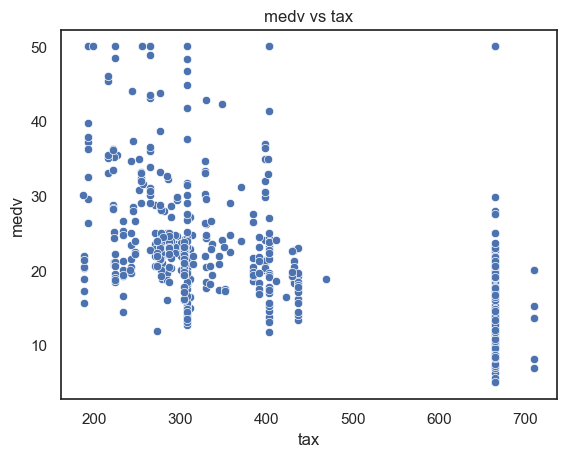

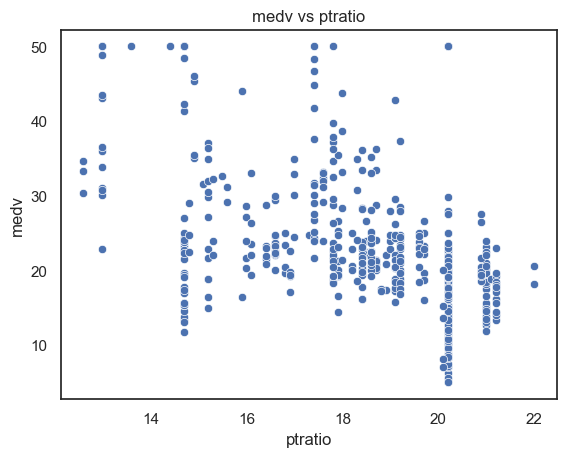

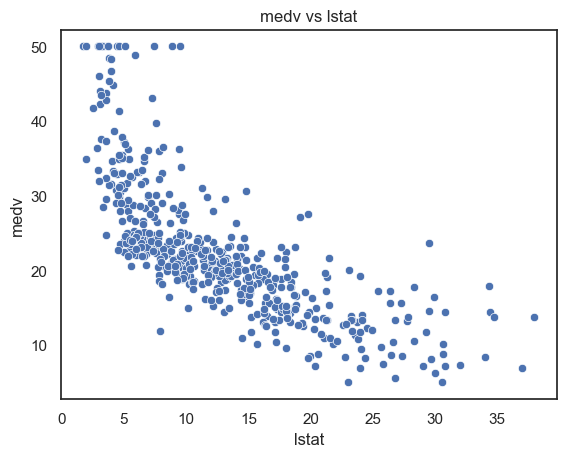

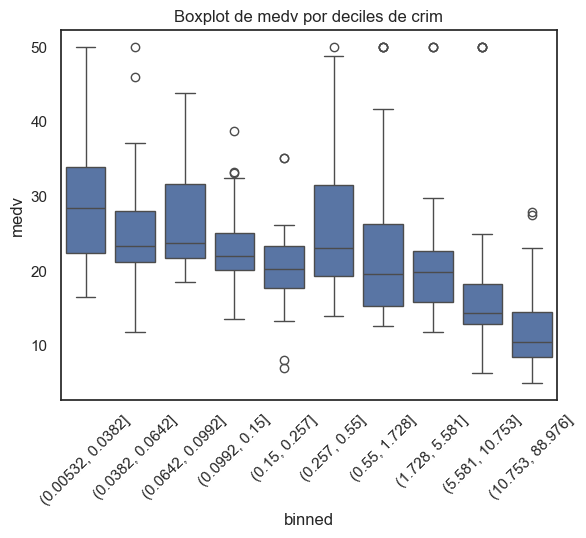

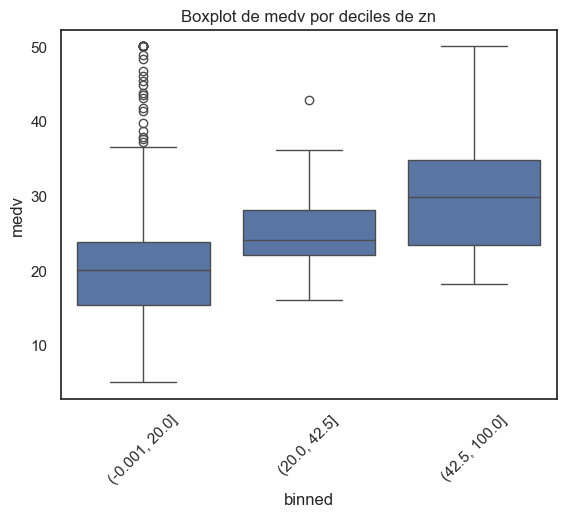

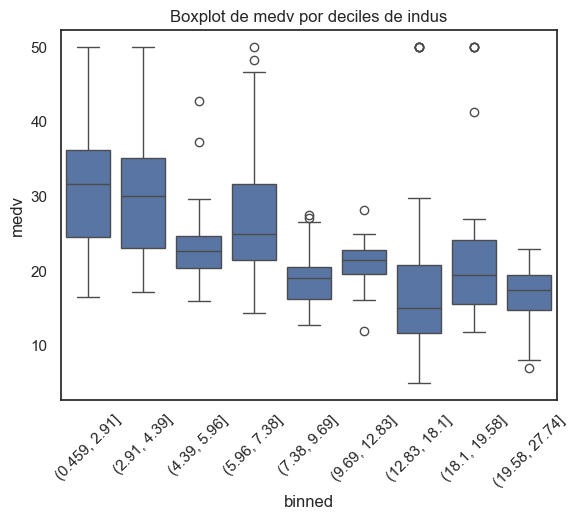

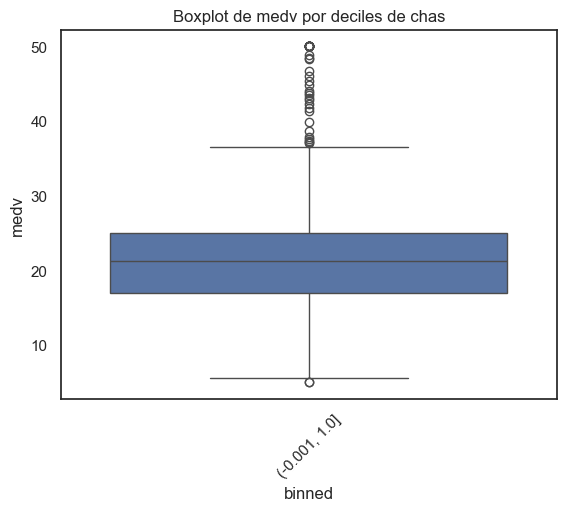

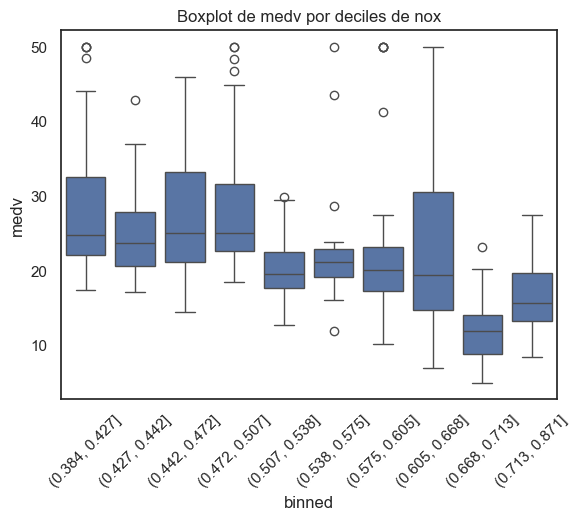

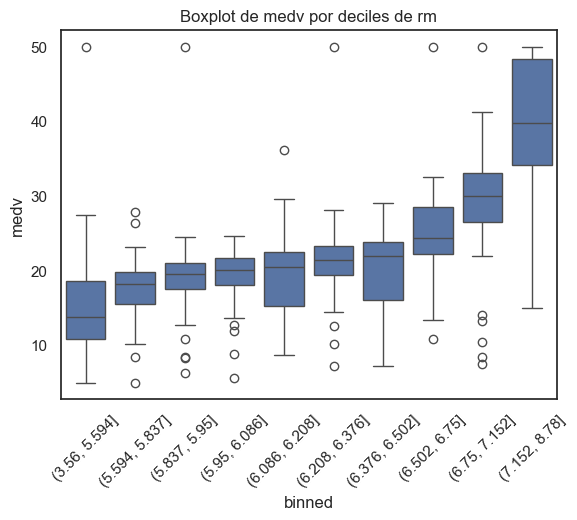

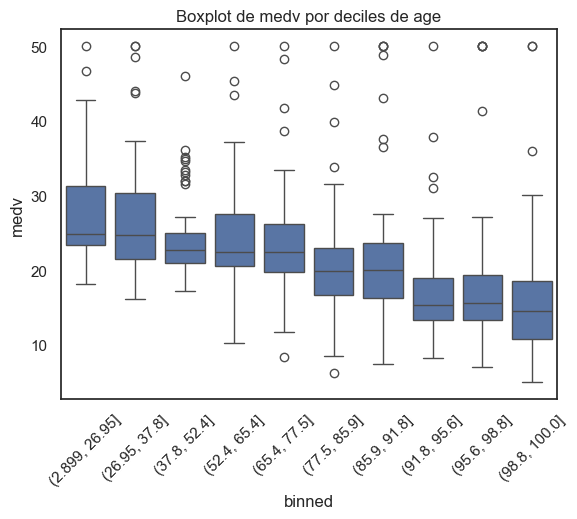

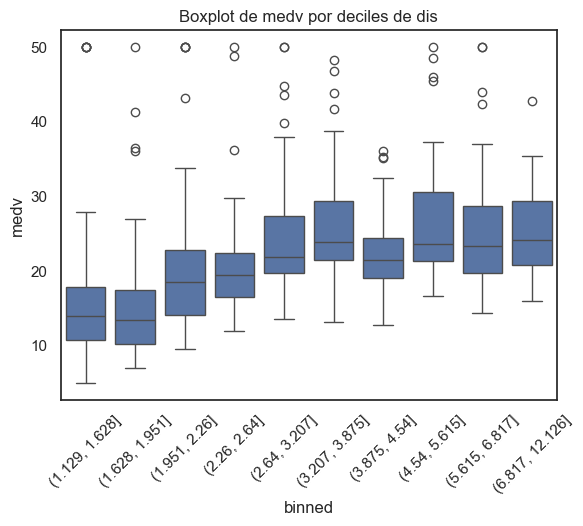

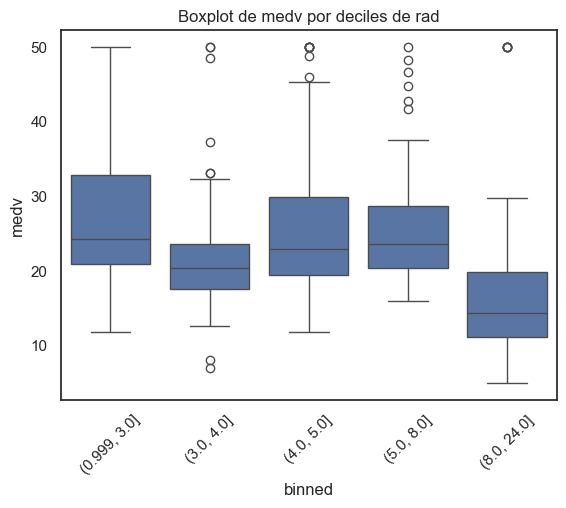

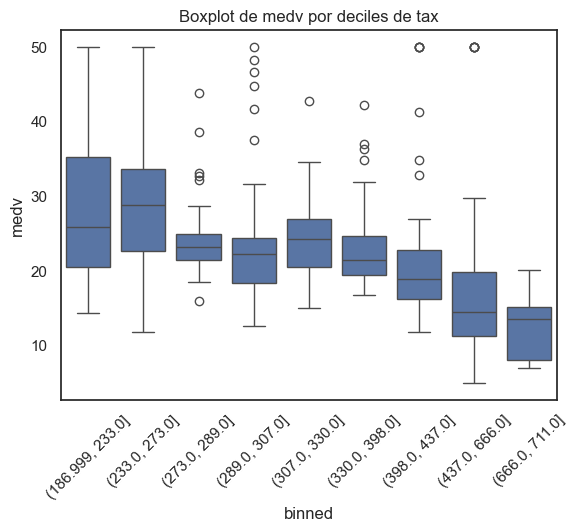

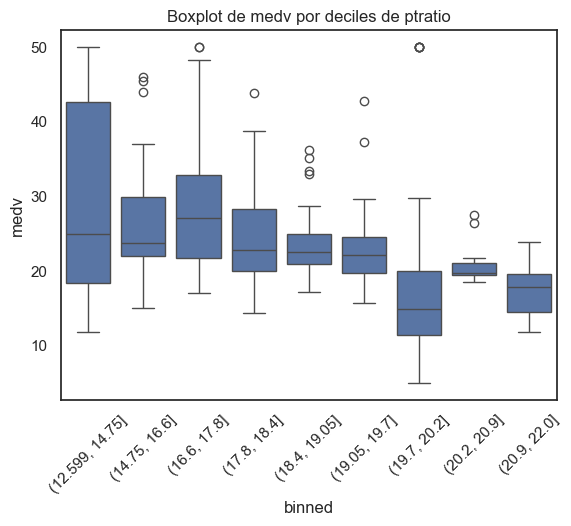

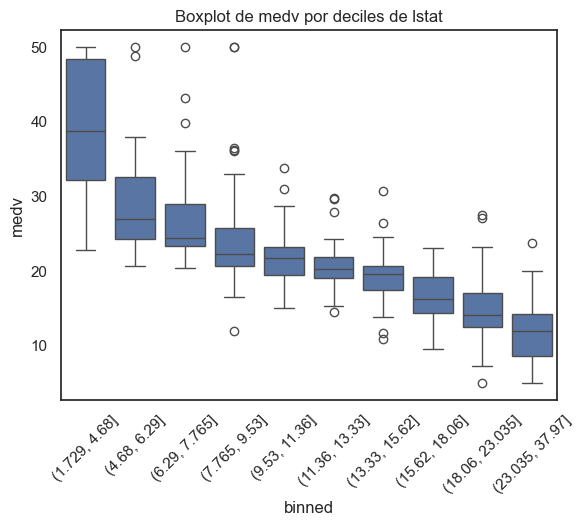

In [59]:
# Establecemos medv como variable dependiente y el resto como explicativas

# Diagrama de dispersión
for column in df.columns:
    if column != "medv":
        sns.scatterplot(x=df[column], y=df["medv"])
        plt.title(f"medv vs {column}")
        plt.xlabel(column)
        plt.ylabel("medv")
        plt.show()

# Diagramas de cajas agrupados por intervalos
for column in df.columns:
    if column != "medv":
        # Creamos intervalos para la variable explicativa
        df["binned"] = pd.qcut(df[column], q=10, duplicates='drop')
        sns.boxplot(x="binned", y="medv", data=df)
        plt.xticks(rotation=45)
        plt.title(f"Boxplot de medv por deciles de {column}")
        plt.show()
        df.drop("binned", axis=1, inplace=True)

<h1 style="color:rgba(25, 142, 219, 1);">REGRESION LINEAL SIMPLE</h2>

### 4. Entrenamiento del modelo de regresión lineal simple

In [60]:
# Vamos a crear una copia del df solo con la variable Istat para crear la regresión lineal simple
df_slr = df[["lstat", "medv"]].copy()

# Dividimos el dataset en conjunto de entrenamiento y prueba
X = df_slr[["lstat"]]
y = df_slr["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Hacemos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([26.09951047, 31.42509574, 17.37173642, 29.50169924, 18.14496114,
       23.26757492, 17.12043839, 11.48556323, 22.39769711, 20.986562  ,
       17.51671606, 18.3092714 , -0.90536293, 22.90995849, 23.48987703,
       23.5671995 , 17.84533656,  5.2417736 , 31.96635304, 17.31374457,
       28.46751118, 27.88759264, 12.99335144, 25.490596  , 19.66241466,
       17.30407926, 26.04151861, 16.75315664, 18.14496114, 21.2088641 ,
       20.63861087, 27.87792733, 21.8467745 , 24.98799993, 14.23051099,
       19.57542688, 30.94183029, 25.36494698, 20.6676068 , 27.54930682,
       14.40448655, 27.55897213, 32.05334082, 22.18506031, 26.32181257,
       18.29960609, 17.10110777, 28.34186216, 19.09216143, 30.02362593,
       22.01108475, 30.40057298, 16.74349134, 27.4236578 , 31.78271217,
       24.61105288, 18.80220216, 31.61840192, 25.53892254, 16.99478937,
       25.65490625, 30.18793618, 31.20279363, 23.53820358, 29.53069517,
       12.51975129, 18.28994078, 28.34186216, 30.66153632, 16.46

In [62]:
# Predicciones sobre el conjunto de entrenamiento
x_predict=model.predict(X_train)
x_predict

array([10.76066505, 26.65043308, 27.26901286, 12.32644511, 23.93448125,
       29.92697284, 27.0950373 , 29.26006652,  9.27220746, 15.71896858,
       28.31286623, 25.7032328 , 28.68981328, 20.17467604, 27.5299762 ,
       18.87952463, 23.22891369, 28.68981328, 22.75531355, 29.1344175 ,
       14.90708262, 24.88168153, 29.22140528, 27.39466188, 28.68981328,
       30.17827087, 20.31965567, 31.20279363,  8.48931743, 27.742613  ,
       22.23338686, 18.31893671,  7.46479468, 23.20958307, 26.61177184,
       31.01915276, 30.60354447, 19.08249612, 20.65794149, 30.03329124,
       24.93967338, 11.65953879,  8.37333372, 24.60138757, 20.22300258,
       15.97026661, 15.62231549, 30.36191174, 19.15981859, 18.94718179,
       29.80132382, 23.19991776, 24.96866931, 28.47717649, 17.31374457,
       27.30767409, 31.99534897, 12.62606969, 22.12706846, 22.12706846,
       22.27204809, 28.19688252, 24.73670189, 23.25790961, 29.12475219,
       17.41039766, 20.52262716, 16.32788305, 21.93376228, 22.97

### 5. Metricas y Coeficientes del modelo de regresión simple

Text(0, 0.5, 'medv')

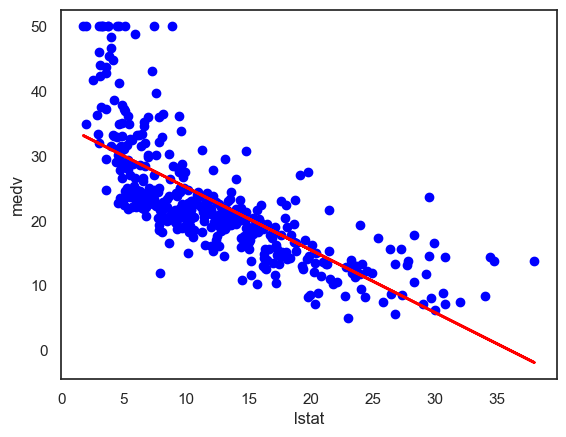

In [63]:
# Vamos a ver la grafica de la regresión lineal simple de nuestros datos de "train"
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train, x_predict, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('lstat')
plt.ylabel('medv')

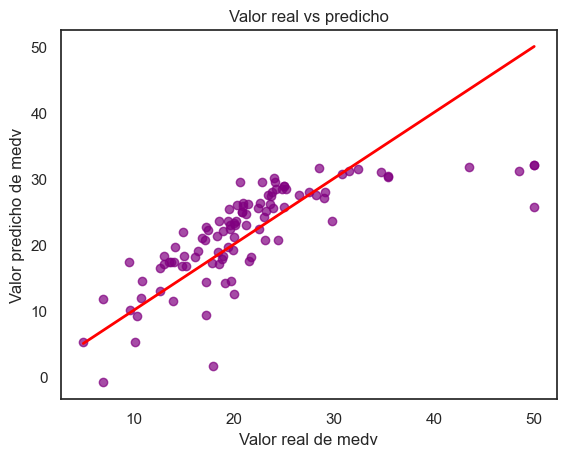

In [64]:
# Vamos a ver la grafica de la regresión lineal simple de nuestros datos de "test"
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)  # línea diagonal perfecta
plt.xlabel("Valor real de medv")
plt.ylabel("Valor predicho de medv")
plt.title("Valor real vs predicho")
plt.show()

In [65]:
# Vemos los coeficientes del modelo de regresión lineal simple
pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

,Variable,Coeficiente
0,lstat,-0.966531


In [66]:
# Calculamos las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)   # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)    # Mean Squared Error
rmse = np.sqrt(mse)                         # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)               # R-squared

metrics = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Valor': [mae, mse, rmse, r2]
})

# Para que se vean mas bonitos los resultados
metrics.style.hide(axis="index").format({'Valor': '{:.2f}'}).set_caption("Metricas resultantes")

Métrica,Valor
MAE,4.18
MSE,33.52
RMSE,5.79
R²,0.54


Podemos ver como nuestro modelo es bastante mediocre (R^2 = 0,54), y en el momento en el cual penalizamos al cuadrado los errores con el MSE se nos lanza por las nubes, lo que significa que hay valores bastante alejados de nuestra linea de regresión, esto lo podemos corroborar con la imagen anterior donde el scatterplot muestra varios valores alejados de nuestra linea de predicción.

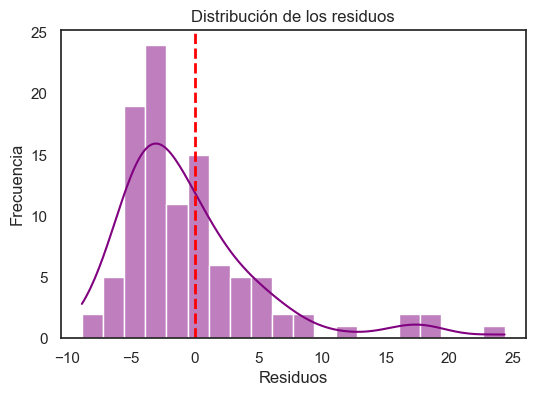

In [67]:
# Analizamos los residuos
residuos = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuos, bins=20, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

<h1 style="color:rgba(211, 96, 20, 1);">REGRESION LINEAL MULTIPLE</h2>

### 6. Entrenamiento del modelo de regresión lineal multiple

In [68]:
# Creamos el df sin la variable CHAS
df_schs = df.drop("medv", axis=1).copy()
df_schs

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [69]:
# Dividimos el dataset en conjunto de entrenamiento y prueba 
X = df_schs     # Todas las variables independientes
y = df["medv"]  # Variable dependiente (medv)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Creamos el modelo de regresión lineal multiple
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Sacamos las predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([28.80733935, 33.60963727, 17.48874157, 29.7980516 , 29.89823736,
       17.39426778, 19.00170308, 19.10032812, 10.10341021, 24.42717882,
       19.98600137, 23.70809914, 19.00525596, 21.95349587, 16.70908709,
       22.61402284, 18.75009343, 35.27808866, 28.97070827, 21.82708925,
       18.1268828 , 23.61210437, 21.7500267 , 28.29570308, 21.05384965,
       35.10672644, 15.96661567, 15.46129373, 15.87042484, 29.53865917,
       -4.08202093, 27.36583907, 12.43001792, 28.06104864, 24.33665362,
       28.17337842, 14.46552518, 13.12768945, 22.67779593, 27.36403128,
       16.95804206, 18.75615396, 25.12523867, 18.96192717,  2.86085376,
       30.44347607, 26.59738261, 20.26628981, 23.25786545, 23.24823121,
       16.28470422, 30.47858747, 26.91934616, 21.7631833 , 13.6517755 ,
       30.28929972, 26.23634643,  6.25418923, 25.06500771, 27.72118478,
       32.25345531, 20.41759478, 13.12311445, 32.61177917, 24.00952537,
       25.33524647, 24.40337936, 23.041324  , 18.75108622, 34.65

In [71]:
# Sacamos las predicciones sobre el conjunto de entrenamiento
x_predict = model.predict(X_train)
x_predict

array([16.7905249 , 33.89020237, 35.64533374, 15.13024889, 13.82132607,
       13.61096044, 18.29957103, 18.45387529, 18.69322226, 11.11803981,
       21.29815358, 31.78281138, 35.52256549, 17.03758661, 18.52066485,
       36.95007096, 19.28879402, 30.82416666, 14.91844993, 19.36749988,
       25.88356758, 32.38253627,  7.6376307 , 23.82414959, 11.89138325,
       23.32426572, 20.01737481, 20.68775087, 35.48343063, 20.88062588,
       21.53662157, 14.05334382, 40.83855991, 26.86672142, 15.86939214,
       21.82954201, 27.15709586, 15.3454321 , 30.50713923, 24.64727499,
       32.94226705, 24.65428002,  3.70962585, 19.69011289, 27.16264113,
       20.70242342, 16.80813588, 42.06327086, 30.781325  , 41.12057799,
       22.69478175, 13.49492337, 33.40577587, 37.3378629 , 17.57938758,
       36.48375815, 37.74778589, 21.41979489, 23.04972403, 20.45788933,
       32.5438012 , 40.80162923, 26.84549224, 17.54525073, 25.32127705,
       17.68419315, 14.15170692, 23.91199844, 17.64081782, 34.23

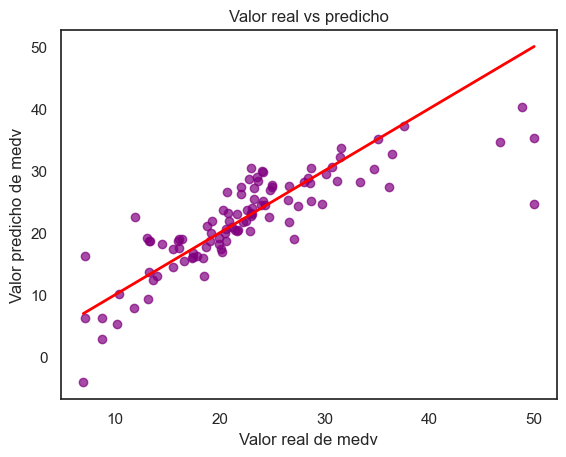

In [72]:
# Vamos a ver la grafica de la regresión lineal simple de nuestros datos de "test"
plt.scatter(y_test, y_pred, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)  # línea diagonal perfecta
plt.xlabel("Valor real de medv")
plt.ylabel("Valor predicho de medv")
plt.title("Valor real vs predicho")
plt.show()

In [73]:
# Calculamos las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)   # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)    # Mean Squared Error
rmse = np.sqrt(mse)                         # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)               # R-squared

metrics = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Valor': [mae, mse, rmse, r2]
})

# Para que se vean mas bonitos los resultados
metrics.style.hide(axis="index").format({'Valor': '{:.2f}'}).set_caption("Metricas resultantes")

Métrica,Valor
MAE,3.20
MSE,23.32
RMSE,4.83
R²,0.68


Aquí vemos como el modelo, al utilizar todas nuestras variables, mejora notablemente, ya que mas o menos obtenemos un 20% de precision con nuestro R^2, al mismo tiempo nuestra métrica mas crítica (MSE) no se aleja tanto como con el modelo de una sola variable independiente.

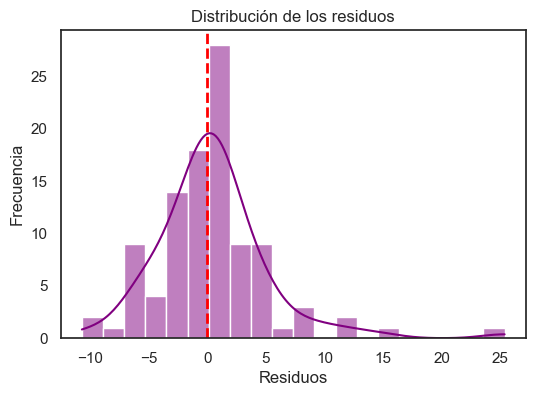

In [74]:
# Analizamos los residuos
residuos = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuos, bins=20, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

### 7. Variación modelo de regresión multiple

In [75]:
# Creamos la variación del modelo donde lstat_age = lstat * age
df["lstat_age"] = df["lstat"] * df["age"]

# Modelo de interacción
X_interact = df[["lstat", "age", "lstat_age"]]
y = df["medv"]

model_interact = LinearRegression()
model_interact.fit(X_interact, y)

# Mostramos los coeficientes del modelo
coef_names = X_interact.columns
for name, coef in zip(coef_names, model_interact.coef_):
    print(f"{name}: {coef:.4f}")

lstat: -1.3921
age: -0.0007
lstat_age: 0.0042


### 8. Transformación de variables

In [76]:
# Agregamos lstat^2 y log(rm) al dataset
df["lstat_squared"] = df["lstat"] ** 2
df["log_rm"] = np.log(df["rm"])

# Cogemos todas las variables incluso las transformadas
X_transformed = df.drop("medv", axis=1).copy()
y = df["medv"]

# Decidimos el modelo de entrenamiento
model_trans=LinearRegression()

# Hacemos cross validation
scores = cross_val_score(model_trans, X_transformed, y, cv=5, scoring='r2')

print("R² por fold:", scores)
print("media de R²:", np.mean(scores))

R² por fold: [0.72106052 0.82710257 0.81139473 0.42728234 0.42978688]
media de R²: 0.6433254079293187


<h1 style="color:rgba(2, 100, 10, 1);">OVERFITTING</h2>

### 9. Analizar el overfitting

In [77]:
# Todas las variables predictoras
X = df.drop(columns=["medv"])  # quitamos la variable dependiente
y = df["medv"]

# Dividimos 10% entrenamiento, 90% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [78]:
# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Vemos el R² en entrenamiento
r2_train = model.score(X_train, y_train)
print("R² en entrenamiento:", r2_train)

R² en entrenamiento: 0.7795761655116402


In [80]:
# Vemos el R² en prueba
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("R² en prueba:", r2_test)

R² en prueba: 0.5225957924565354


Como podemos observar el modelo está notablemente sobreajustado con las variables que hemos añadido, ya que obtenemos hasta un 25% mas de mejora en R^2 del modelo de prueba al modelo de entrnamiento. Esto no nos es favorable a la hora de intentar predecir nuevos datos.

### 10. Lasso y Ridge Regression

Ridge intenta "normalizar" valores que añaden ruido al modelo de aprendizaje, al valor determinado por la persona (en este caso alpha = 5), esto hace que variables que no aportan nada no afecten a la decisión del modelo para predecir e y así evite el overfitting.

In [81]:
# Aplicamos Ridge
ridge5 = Ridge(alpha=5)
ridge5.fit(X_train, y_train)

r2_train_ridge = ridge5.score(X_train, y_train)
r2_test_ridge = ridge5.score(X_test, y_test)

print("Ridge R² train:", r2_train_ridge)
print("Ridge R² test:", r2_test_ridge)

Ridge R² train: 0.6799777814891866
Ridge R² test: 0.7174247621001445


Lass por la otra parte, en vez de reducir los valores, directamente los elimina para evitar el ruido que generan en el modelo de predicción.

In [82]:
# Aplicamos Lasso
lasso05 = Lasso(alpha=0.05)
lasso05.fit(X_train, y_train)

r2_train_lasso = lasso05.score(X_train, y_train)
r2_test_lasso = lasso05.score(X_test, y_test)

print("Lasso R² train:", r2_train_lasso)
print("Lasso R² test:", r2_test_lasso)

Lasso R² train: 0.702507458491136
Lasso R² test: 0.6913243251899059
